In [1]:
%load_ext autoreload
%autoreload 2

from tqdm import tqdm
import terra
import numpy as np
import meerkat as mk
import pandas as pd

from domino.sdm.george import GeorgeSDM

In [2]:
data_dp, _ = terra.out(1425, load=True)
data_dp["activation_model.layer4"] = data_dp["activation_layer4"]

In [3]:
sdm = GeorgeSDM(config={"n_slices": 5})

In [4]:
sdm.fit(data_dp)

In [5]:
out = sdm.transform(data_dp)

In [8]:
import seaborn as sns

In [ ]:
sns.scatterplot(data=out.to_pandas(), x="george_umap_0", y="george_umap_1")

<AxesSubplot:xlabel='george_umap_0', ylabel='george_umap_1'>

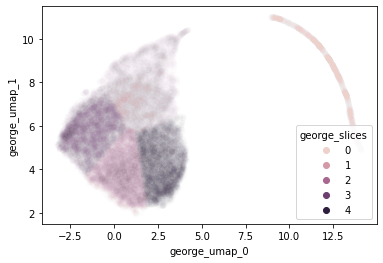

In [13]:
df = out[["george_umap_0", "george_umap_1", "george_slices"]].to_pandas()
sns.scatterplot(
    data=df, 
    x="george_umap_0", 
    y="george_umap_1",
    alpha=0.01,
    hue="george_slices"
)

In [19]:
(out["qw"] == out["george_slice_1"]).mean()

0.6971746318004208

In [20]:
out

,file (NumpyArrayColumn),eyeglasses (NumpyArrayColumn),wearing_necktie (NumpyArrayColumn),output (ClassificationOutputColumn),activation_layer4 (TensorColumn),index (ListColumn),activation_model.layer4 (TensorColumn),george_umap_0 (NumpyArrayColumn),george_umap_1 (NumpyArrayColumn),george_slices (NumpyArrayColumn),george_slice_0 (NumpyArrayColumn),george_slice_1 (NumpyArrayColumn),george_slice_2 (NumpyArrayColumn),george_slice_3 (NumpyArrayColumn),george_slice_4 (NumpyArrayColumn)
0,182638.jpg,0,0,torch.Tensor(shape=torch.Size([2])),"torch.Tensor(shape=torch.Size([512, 8, 8]))",'182637',"torch.Tensor(shape=torch.Size([512, 8, 8]))",0.191805,4.584727,2,0,0,1,0,0
1,182639.jpg,0,0,torch.Tensor(shape=torch.Size([2])),"torch.Tensor(shape=torch.Size([512, 8, 8]))",'182638',"torch.Tensor(shape=torch.Size([512, 8, 8]))",2.049606,5.617980,4,0,0,0,0,1
2,182640.jpg,0,0,torch.Tensor(shape=torch.Size([2])),"torch.Tensor(shape=torch.Size([512, 8, 8]))",'182639',"torch.Tensor(shape=torch.Size([512, 8, 8]))",2.517517,2.634182,4,0,0,0,0,1
3,182641.jpg,0,0,torch.Tensor(shape=torch.Size([2])),"torch.Tensor(shape=torch.Size([512, 8, 8]))",'182640',"torch.Tensor(shape=torch.Size([512, 8, 8]))",2.509856,3.114704,4,0,0,0,0,1
4,182642.jpg,0,0,torch.Tensor(shape=torch.Size([2])),"torch.Tensor(shape=torch.Size([512, 8, 8]))",'182641',"torch.Tensor(shape=torch.Size([512, 8, 8]))",0.485091,7.997379,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19957,202595.jpg,0,0,torch.Tensor(shape=torch.Size([2])),"torch.Tensor(shape=torch.Size([512, 8, 8]))",'202594',"torch.Tensor(shape=torch.Size([512, 8, 8]))",-0.701764,3.185291,2,0,0,1,0,0
19958,202596.jpg,0,0,torch.Tensor(shape=torch.Size([2])),"torch.Tensor(shape=torch.Size([512, 8, 8]))",'202595',"torch.Tensor(shape=torch.Size([512, 8, 8]))",-1.327507,5.982368,3,0,0,0,1,0
19959,202597.jpg,1,0,torch.Tensor(shape=torch.Size([2])),"torch.Tensor(shape=torch.Size([512, 8, 8]))",'202596',"torch.Tensor(shape=torch.Size([512, 8, 8]))",12.937028,8.011242,0,1,0,0,0,0
19960,202598.jpg,0,0,torch.Tensor(shape=torch.Size([2])),"torch.Tensor(shape=torch.Size([512, 8, 8]))",'202597',"torch.Tensor(shape=torch.Size([512, 8, 8]))",0.944267,4.018486,2,0,0,1,0,0
